<a href="https://colab.research.google.com/github/YangHyunu/Signiture/blob/main/12_multi_nn_rf_svc_%EB%B9%84%EA%B5%90_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NN 다중분류
- 펭귄데이터 셋
  - 세 종의 펭귄을 분류하는게 목표

In [167]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 6.03 s (started: 2024-07-07 13:08:16 +00:00)


In [168]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 665 µs (started: 2024-07-07 13:08:22 +00:00)


## 1.데이터 준비

In [169]:
!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv

--2024-07-07 13:08:22--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13523 (13K) [text/plain]
Saving to: ‘penguins.csv.3’

penguins.csv.3      100%[===================>]  13.21K  --.-KB/s    in 0s      

2024-07-07 13:08:22 (79.8 MB/s) - ‘penguins.csv.3’ saved [13523/13523]

time: 111 ms (started: 2024-07-07 13:08:22 +00:00)


In [170]:
penguins = pd.read_csv('/content/penguins.csv')
penguins.shape

(344, 7)

time: 8.26 ms (started: 2024-07-07 13:08:22 +00:00)


In [171]:
df = penguins.copy()
df.head()

,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 30.1 ms (started: 2024-07-07 13:08:22 +00:00)


  - 컬럼명 변경, 데이터의 전처리 필요!

In [172]:
# 컬럼 처리
df.columns = [col.lower().replace(' ', '_').replace('(', '_').replace(')', '')    for col in df.columns]
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 26.6 ms (started: 2024-07-07 13:08:22 +00:00)


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
time: 8.33 ms (started: 2024-07-07 13:08:22 +00:00)


In [174]:
df.isna().sum() # na 값이 적어보이지만 실제로는 더 많을것으로 추정됨

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

time: 10.3 ms (started: 2024-07-07 13:08:22 +00:00)


In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


time: 49.8 ms (started: 2024-07-07 13:08:22 +00:00)


### 범주형 변수

In [176]:
cols_cat = df.select_dtypes(include=['object'])
cols_cat.head(5)

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE


time: 22.8 ms (started: 2024-07-07 13:08:22 +00:00)


In [177]:
cols_cat['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

time: 6.93 ms (started: 2024-07-07 13:08:22 +00:00)


In [178]:
cols_cat['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

time: 9.07 ms (started: 2024-07-07 13:08:22 +00:00)


In [179]:
cols_cat['sex'].value_counts() # .이라는 이상값이 존재함

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

time: 7.46 ms (started: 2024-07-07 13:08:22 +00:00)


In [180]:
# .이라는 이상값을 FEMALE로 변경
cols_cat.loc[cols_cat['sex']=='.', 'sex'] = 'FEMALE'
cols_cat['sex'].value_counts()

sex
MALE      168
FEMALE    166
Name: count, dtype: int64

time: 6.41 ms (started: 2024-07-07 13:08:22 +00:00)


In [181]:
df.loc[cols_cat['sex']=='.', 'sex'] = 'FEMALE'
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

time: 13.1 ms (started: 2024-07-07 13:08:22 +00:00)


### groupby 함수를 사용하여 각 섬별 펭귄 수를 볼 수 있다.
  - Torgersen 섬에는 Adelie 펭귄만 사는것 같다. 확인필요..

In [182]:
df.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: count, dtype: int64

time: 9.44 ms (started: 2024-07-07 13:08:22 +00:00)


### 연속형변수

In [183]:
cols_num = df.select_dtypes(include=['number'])
cols_num.head(5) # 역시 결측값이 존재한다.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


time: 25.4 ms (started: 2024-07-07 13:08:22 +00:00)


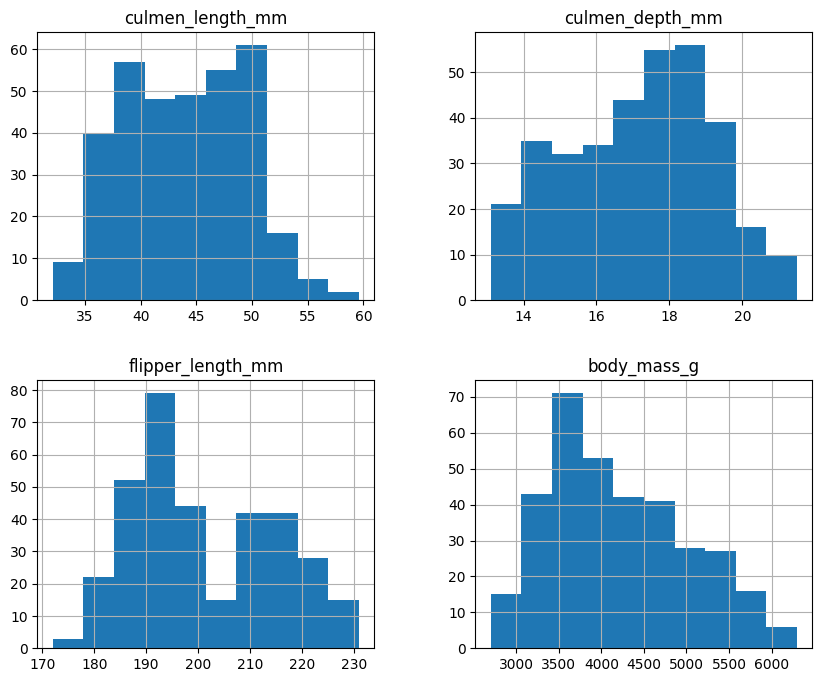

time: 1.19 s (started: 2024-07-07 13:08:23 +00:00)


In [184]:
cols_num.hist(figsize=(10, 8))
plt.show()

### 이상치

In [185]:
cols_num.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

time: 7.55 ms (started: 2024-07-07 13:08:24 +00:00)


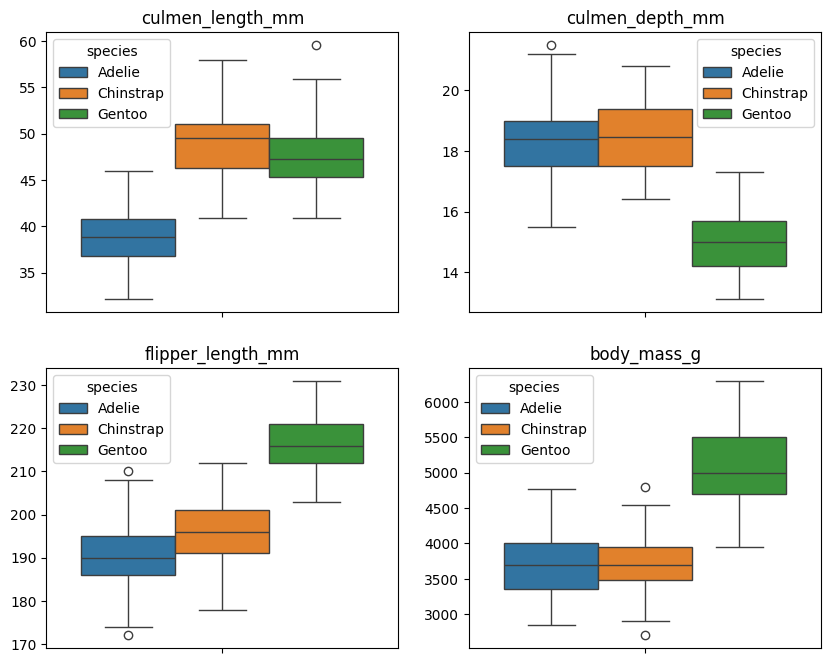

time: 1.51 s (started: 2024-07-07 13:08:24 +00:00)


In [186]:
# 박스플롯
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(cols_num.columns):
    sns.boxplot(y=col, data=cols_num, hue=df['species'], ax=axes[i])
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].set_title(col)

In [187]:
# 데이터 분리
# 결측치
# 인코딩
# 학습

time: 412 µs (started: 2024-07-07 13:08:25 +00:00)


## 2.트레인, 테스트 분리

In [188]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['species']) # 각 종이 균형있게 할당되도록 함함

train.shape, test.shape

((275, 7), (69, 7))

time: 7.29 ms (started: 2024-07-07 13:08:25 +00:00)


### 결측치처리

In [189]:
train.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

time: 30 ms (started: 2024-07-07 13:08:25 +00:00)


- heatmap으로 결측값 확인 <흰색>이 결측값

<Axes: >

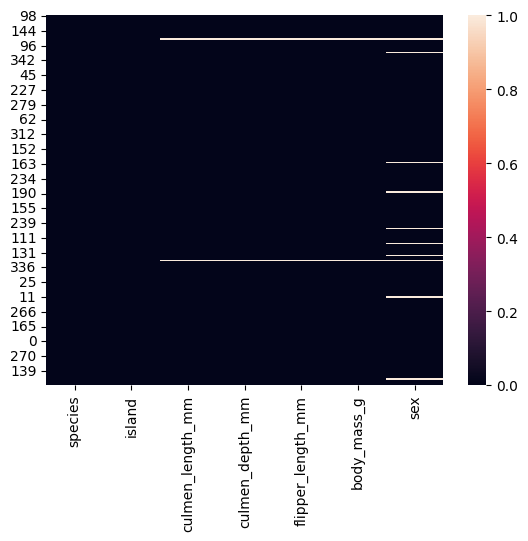

time: 1.66 s (started: 2024-07-07 13:08:25 +00:00)


In [190]:
sns.heatmap(train.isna())

In [191]:
train = train.dropna() # 결측값이 많지 않아 그냥 드랍시킴

time: 5.3 ms (started: 2024-07-07 13:08:27 +00:00)


### X, y 분리

In [192]:
X_train = train.drop('species', axis=1)
y_train = train['species']

X_train.shape, y_train.shape

((265, 6), (265,))

time: 13.9 ms (started: 2024-07-07 13:08:27 +00:00)


In [193]:
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,Dream,33.1,16.1,178.0,2900.0,FEMALE
114,Biscoe,39.6,20.7,191.0,3900.0,FEMALE
118,Torgersen,35.7,17.0,189.0,3350.0,FEMALE
303,Biscoe,50.0,15.9,224.0,5350.0,MALE
343,Biscoe,49.9,16.1,213.0,5400.0,MALE


time: 67.5 ms (started: 2024-07-07 13:08:27 +00:00)


### 인코딩 <범주형 변수를 각 숫자로 매핑함>

In [194]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

X_train[['island', 'sex']] = oe.fit_transform(X_train[['island', 'sex']])
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,1.0,33.1,16.1,178.0,2900.0,1.0
114,0.0,39.6,20.7,191.0,3900.0,1.0
118,2.0,35.7,17.0,189.0,3350.0,1.0
303,0.0,50.0,15.9,224.0,5350.0,2.0
343,0.0,49.9,16.1,213.0,5400.0,2.0


time: 54 ms (started: 2024-07-07 13:08:27 +00:00)


- 각 섬, 성별이 숫자로 매핑된것을 볼 수 있다.

### 레이블 인코딩
    만약 이진 분류라면 원-핫 인코딩 할 필요 없이 레이블 인코딩만 하면 됨

In [195]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_e = le.fit_transform(y_train)
y_train_e[:5]


array([0, 0, 0, 2, 2])

time: 11.2 ms (started: 2024-07-07 13:08:27 +00:00)


### 스케일링

In [196]:
X_train.describe()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,265.00000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,0.65283,44.163396,17.183019,200.969811,4220.754717,1.501887
std,0.71790,5.499668,2.007084,13.911756,809.351941,0.508448
min,0.00000,33.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.00000,39.600000,15.600000,190.000000,3550.000000,1.000000
50%,1.00000,45.100000,17.300000,197.000000,4050.000000,2.000000
75%,1.00000,48.700000,18.800000,213.000000,4800.000000,2.000000
max,2.00000,59.600000,21.500000,231.000000,6300.000000,2.000000


time: 176 ms (started: 2024-07-07 13:08:27 +00:00)


In [197]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_s = rs.fit_transform(X_train)
X_train_s[:5]

array([[ 0.        , -1.31868132, -0.375     , -0.82608696, -0.92      ,
        -1.        ],
       [-1.        , -0.6043956 ,  1.0625    , -0.26086957, -0.12      ,
        -1.        ],
       [ 1.        , -1.03296703, -0.09375   , -0.34782609, -0.56      ,
        -1.        ],
       [-1.        ,  0.53846154, -0.4375    ,  1.17391304,  1.04      ,
         0.        ],
       [-1.        ,  0.52747253, -0.375     ,  0.69565217,  1.08      ,
         0.        ]])

time: 55.8 ms (started: 2024-07-07 13:08:27 +00:00)


## 3.모델 학습

- 다중 분류 문제에서 모델이 각 클래스의 확률을 출력하도록 학습하려면, 레이블을 원-핫 인코딩 형태로 변환해야 함

In [198]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train_e)
y_train_o[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

time: 9.74 ms (started: 2024-07-07 13:08:28 +00:00)


In [199]:
print(X_train_s.shape, y_train_o.shape)
print(type(X_train_s), type(y_train_o))


(265, 6) (265, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 5.3 ms (started: 2024-07-07 13:08:28 +00:00)


In [200]:
X_train_s.shape

(265, 6)

time: 7.92 ms (started: 2024-07-07 13:08:28 +00:00)


In [201]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=16, activation='relu', input_shape=(6,)),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=3, activation='softmax'),
])

time: 101 ms (started: 2024-07-07 13:08:28 +00:00)


In [202]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                112       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 3)                 27        
                                                                 
Total params: 275 (1.07 KB)
Trainable params: 275 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 37.6 ms (started: 2024-07-07 13:08:28 +00:00)


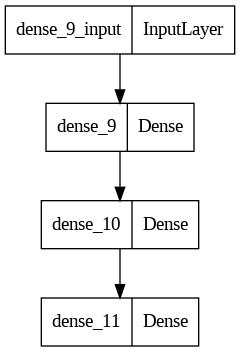

time: 156 ms (started: 2024-07-07 13:08:28 +00:00)


In [203]:
from keras import utils

utils.plot_model(model)

In [204]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

time: 40.9 ms (started: 2024-07-07 13:08:28 +00:00)


In [205]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
)


Epoch 1/100
14/14 [==============================] - 3s 37ms/step - loss: 1.0268 - accuracy: 0.6934 - val_loss: 1.0128 - val_accuracy: 0.7736
Epoch 2/100
14/14 [==============================] - 0s 13ms/step - loss: 0.9899 - accuracy: 0.8113 - val_loss: 0.9792 - val_accuracy: 0.7547
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 0.9513 - accuracy: 0.8208 - val_loss: 0.9415 - val_accuracy: 0.7358
Epoch 4/100
14/14 [==============================] - 0s 11ms/step - loss: 0.9073 - accuracy: 0.8113 - val_loss: 0.8974 - val_accuracy: 0.7358
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 0.8558 - accuracy: 0.8113 - val_loss: 0.8481 - val_accuracy: 0.7358
Epoch 6/100
14/14 [==============================] - 0s 16ms/step - loss: 0.7992 - accuracy: 0.8113 - val_loss: 0.7954 - val_accuracy: 0.7358
Epoch 7/100
14/14 [==============================] - 0s 9ms/step - loss: 0.7372 - accuracy: 0.8113 - val_loss: 0.7388 - val_accuracy: 0.7358
Epoch 8

### 학습과정 시각화

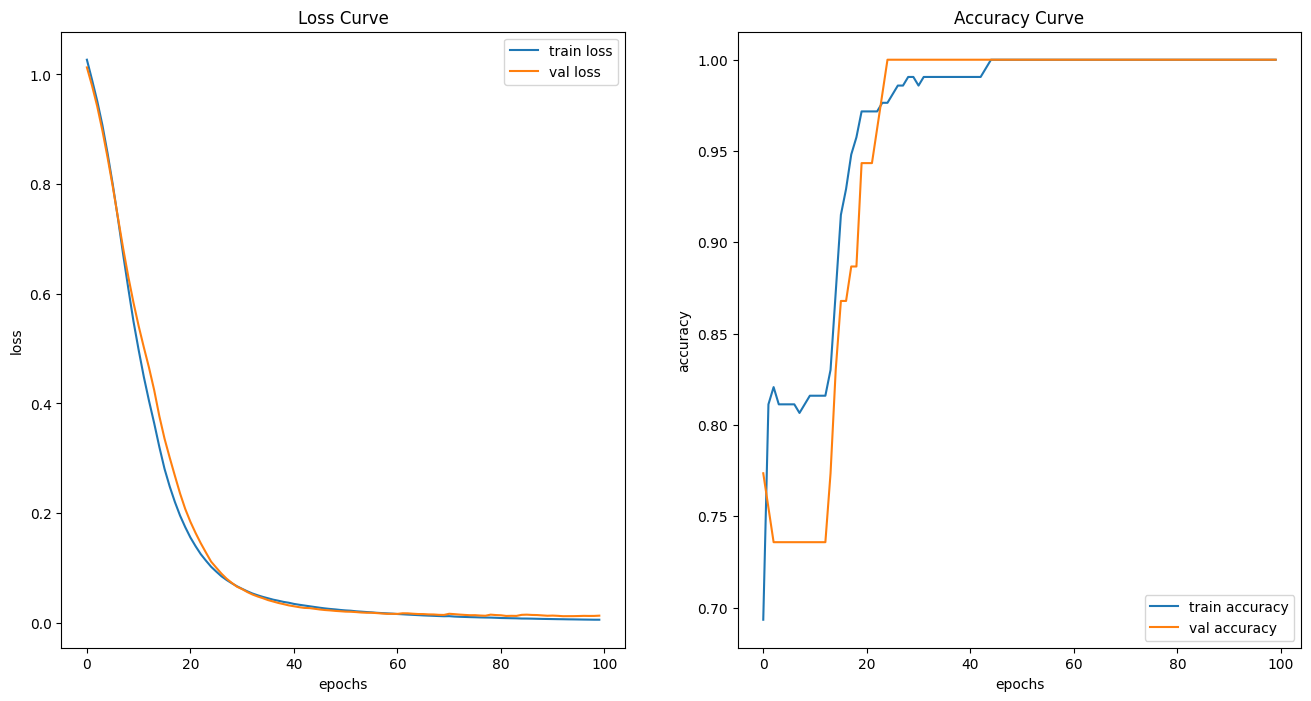

time: 1.65 s (started: 2024-07-07 13:08:51 +00:00)


In [206]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

## 모델 평가

In [207]:
test.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

time: 20.4 ms (started: 2024-07-07 13:08:53 +00:00)


<Axes: >

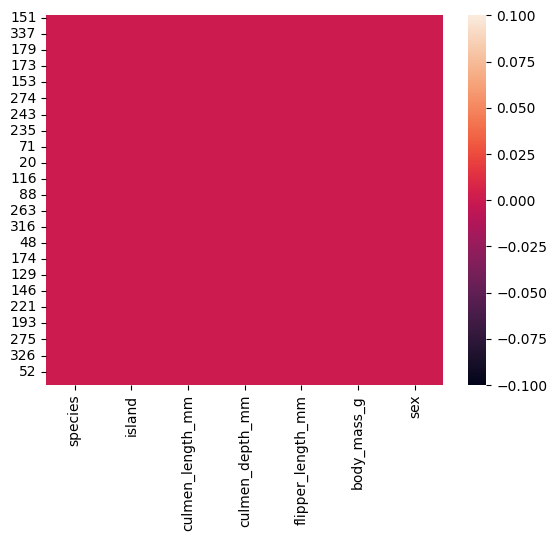

time: 1.75 s (started: 2024-07-07 13:08:53 +00:00)


In [208]:
sns.heatmap(test.isna())

In [209]:
# 평가 확인 (테스트 데이터 전처리를 ...)
X_test = test.drop('species', axis=1)
y_test = test['species']

time: 23.2 ms (started: 2024-07-07 13:08:55 +00:00)


In [210]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
X_test[['island','sex']]=oe.fit_transform(X_test[['island','sex']])

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y_test_e =le.fit_transform(y_test)
y_test_e

from keras import utils
y_test_o = utils.to_categorical(y_test_e)

from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
X_test_s = rs.fit_transform(X_test)
X_test_s[:5]

array([[ 0.        , -0.19101124,  0.42857143,  0.08333333,  0.04347826,
         1.        ],
       [ 1.        , -0.41573034,  0.03571429, -0.54166667, -0.13043478,
         0.        ],
       [-1.        ,  0.35955056, -0.82142857,  0.70833333,  0.65217391,
         0.        ],
       [-1.        ,  0.62921348, -0.39285714,  0.95833333,  1.7826087 ,
         1.        ],
       [ 0.        ,  0.3258427 ,  0.32142857, -0.875     , -0.60869565,
         0.        ]])

time: 54.5 ms (started: 2024-07-07 13:08:55 +00:00)


In [211]:
y_test_o[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

time: 12.5 ms (started: 2024-07-07 13:08:55 +00:00)


In [212]:
y_pred = model.predict(X_test_s)
y_pred[:10]

3/3 [==============================] - 0s 5ms/step


array([[9.97637391e-01, 2.03795824e-03, 3.24706984e-04],
       [9.97926652e-01, 2.01865681e-03, 5.47676609e-05],
       [1.19901168e-04, 1.25414599e-03, 9.98625934e-01],
       [2.85340677e-04, 6.78041892e-04, 9.99036610e-01],
       [5.00592915e-03, 9.94866908e-01, 1.27234598e-04],
       [9.87152517e-01, 1.23851970e-02, 4.62247204e-04],
       [1.69041697e-02, 9.82559979e-01, 5.35891159e-04],
       [4.09111730e-04, 2.45031319e-03, 9.97140646e-01],
       [4.36514569e-03, 9.94232893e-01, 1.40192453e-03],
       [1.20150875e-02, 9.86700714e-01, 1.28429732e-03]], dtype=float32)

time: 2.61 s (started: 2024-07-07 13:08:55 +00:00)


In [213]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)
y_pred[:10]

array([0, 0, 2, 2, 1, 0, 1, 2, 1, 1])

time: 13.3 ms (started: 2024-07-07 13:08:57 +00:00)


In [214]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

time: 9.43 ms (started: 2024-07-07 13:08:57 +00:00)


In [215]:
y_test_o= np.argmax(y_test_o, axis=1) #다시 정수형 레이블 즉 1차원 벡터로 변환

time: 7.97 ms (started: 2024-07-07 13:09:11 +00:00)


accuracy: 0.9855072463768116
recall: 0.9866666666666667
precision: 0.989247311827957
f1 : 0.9877327980372477


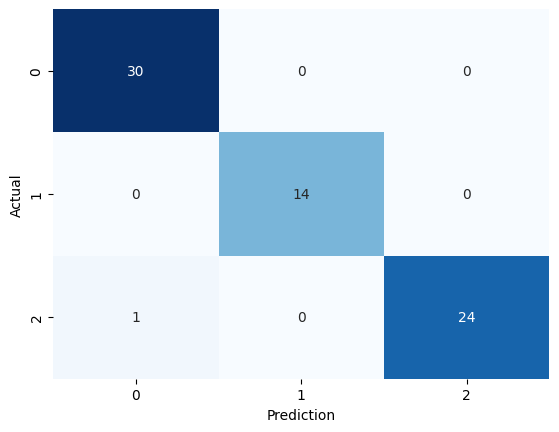

time: 271 ms (started: 2024-07-07 13:09:43 +00:00)


In [216]:
print_metrics(y_test_o, y_pred, aver='macro')

### 랜덤 포레스트

In [217]:
from sklearn.ensemble import RandomForestClassifier
clf_r = RandomForestClassifier(n_estimators=100,random_state=42)
clf_r.fit(X_train_s,y_train_o)

RandomForestClassifier(random_state=42)

time: 402 ms (started: 2024-07-07 13:10:51 +00:00)


  - !! y_pred 값을 2차원 백터에서 1차원 백터로 변환 이후에 평가를 위한 함수에 입력해야 함!

In [225]:
y_pred_rf = clf_r.predict(X_test_s)
y_pred_rf[:10]
y_pred_rf = np.argmax(y_pred_rf, axis=1)
y_pred_rf[:10]

array([0, 0, 2, 2, 1, 0, 1, 2, 1, 1])

time: 50.3 ms (started: 2024-07-07 13:14:23 +00:00)


In [228]:
confusion_matrix(y_test_o,y_pred_rf) # 1차원 백터로 변환해서 입력함

array([[27,  3,  0],
       [ 0, 14,  0],
       [ 0,  0, 25]])

time: 20 ms (started: 2024-07-07 13:15:20 +00:00)


accuracy: 0.9565217391304348
recall: 0.9666666666666667
precision: 0.9411764705882352
f1 : 0.9501980758347481


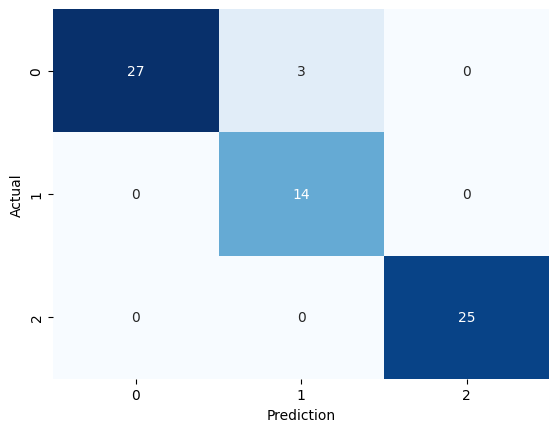

time: 375 ms (started: 2024-07-07 13:15:43 +00:00)


In [230]:
print_metrics(y_test_o,y_pred_rf,aver='macro')

### SVC
    - SVC 는 입력값을 1차원 벡터로 받기 때문에 y_train_e<레이블 인코딩 된>를 사용

In [233]:
from sklearn.svm import SVC
clf = SVC(random_state=42)
clf.fit(X_train_s,y_train_e)

SVC(random_state=42)

time: 12.5 ms (started: 2024-07-07 13:19:06 +00:00)


In [234]:
y_pred_svc = clf.predict(X_test_s)

time: 2.71 ms (started: 2024-07-07 13:19:17 +00:00)


accuracy: 0.9855072463768116
recall: 0.9761904761904763
precision: 0.989247311827957
f1 : 0.9821898401133374


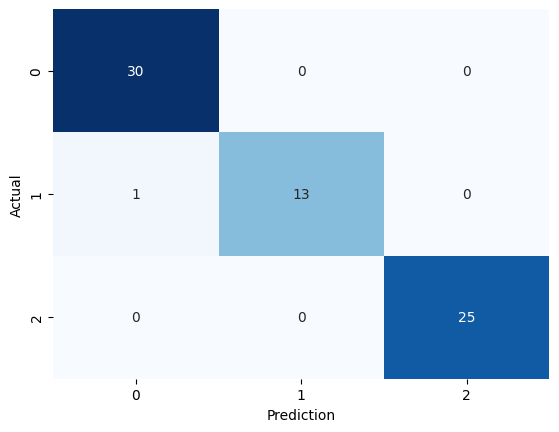

time: 200 ms (started: 2024-07-07 13:19:28 +00:00)


In [235]:
print_metrics(y_test_e,y_pred_svc,aver='macro')

## 결론
  - nn , rf, svc 모두 훌륭한 성과를 보여줬다.
  - 각 모델의 학습과 평가에 필요한 입력 형식이 다르므로 이에 주의해야 한다 !!!!